* youtube : https://youtu.be/y-oJYSoUNyI
* ref : https://github.com/kairess/corona-virus-prediction
* lib : https://facebook.github.io/prophet/

# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prophet (ARIMA 확장형 시계열 모델) : 설치가 안돼서 코랩에서만 구동
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

# 시계열 시각화 라이브러리
import plotly.graph_objs as go
import plotly.offline as py

# read

In [2]:
# 코스피 일별 OHLCV
df = pd.read_csv('/content/drive/MyDrive/파이널_포트폴리오/금융/input/kospi.csv')
df.head()

,Date,Close,Open,High,Low,Volume,Change
0,2003-07-29,722.33,718.42,722.47,715.01,566860000.0,0.0063
1,2003-07-30,714.15,721.66,724.23,714.07,502180000.0,-0.0113
2,2003-07-31,713.52,716.50,718.49,710.01,388890000.0,-0.0009
3,2003-08-01,727.26,718.84,728.38,718.25,457000000.0,0.0193
4,2003-08-04,718.54,719.57,724.17,717.46,439400000.0,-0.0120


# preprocessing

In [3]:
# prophet 모델은 날짜를 'ds', target을 'y'로 설정해줘야 함

df = df[['Date', 'Close']]
df.columns = ['ds', 'y']

df.head()

,ds,y
0,2003-07-29,722.33
1,2003-07-30,714.15
2,2003-07-31,713.52
3,2003-08-01,727.26
4,2003-08-04,718.54


In [4]:
df.tail()

,ds,y
4517,2021-11-02,3013.49
4518,2021-11-03,2975.71
4519,2021-11-04,2983.22
4520,2021-11-05,2969.27
4521,2021-11-08,2960.20


In [5]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=df['ds'], y=df['y'], name='KOSPI'
    )
)

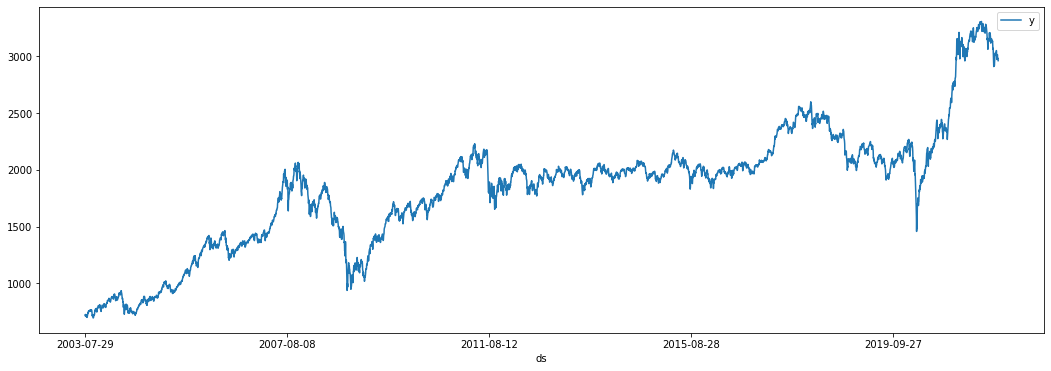

In [6]:
df.plot(x='ds', y='y', figsize=(18, 6))

# prophet

In [7]:
model = Prophet()
model.fit(df) # 2003-07-29 ~ 2021-11-08 학습

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
# 예측할 데이터프레임을 만들어 줌 : 마지막 날 이후 300일
future = model.make_future_dataframe(periods=300)
future

,ds
0,2003-07-29
1,2003-07-30
2,2003-07-31
3,2003-08-01
4,2003-08-04
...,...
4817,2022-08-31
4818,2022-09-01
4819,2022-09-02
4820,2022-09-03


In [9]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4817,2022-08-31,2965.985549,2691.009546,3221.661497,2896.232694,3044.074061,-11.743710,-11.743710,-11.743710,1.802223,1.802223,1.802223,-13.545933,-13.545933,-13.545933,0.0,0.0,0.0,2954.241839
4818,2022-09-01,2966.509716,2694.770460,3212.710906,2896.425575,3045.226520,-8.204540,-8.204540,-8.204540,3.692108,3.692108,3.692108,-11.896648,-11.896648,-11.896648,0.0,0.0,0.0,2958.305176
4819,2022-09-02,2967.033883,2700.077263,3221.159398,2896.386384,3046.476486,-9.022898,-9.022898,-9.022898,1.132155,1.132155,1.132155,-10.155053,-10.155053,-10.155053,0.0,0.0,0.0,2958.010984
4820,2022-09-03,2967.558049,2699.170450,3206.804555,2896.214291,3047.815057,-11.702136,-11.702136,-11.702136,-3.357945,-3.357945,-3.357945,-8.344191,-8.344191,-8.344191,0.0,0.0,0.0,2955.855913
4821,2022-09-04,2968.082216,2691.143605,3226.346573,2896.255908,3049.153629,-9.845553,-9.845553,-9.845553,-3.357945,-3.357945,-3.357945,-6.487608,-6.487608,-6.487608,0.0,0.0,0.0,2958.236663


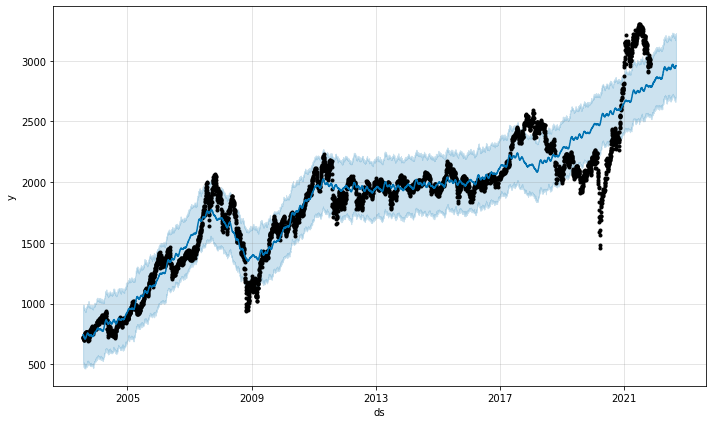

In [10]:
fig1 = model.plot(forecast) # 검은 점 실제 데이터

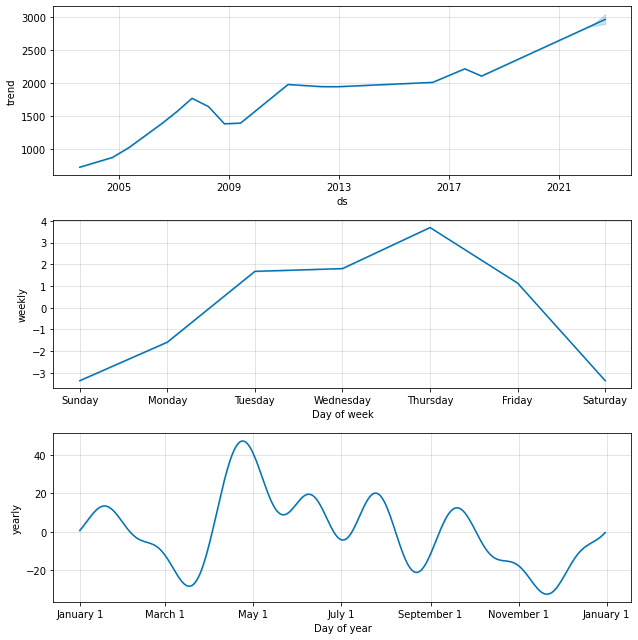

In [11]:
fig2 = model.plot_components(forecast)

In [12]:
fig3 = plot_plotly(model, forecast)
py.iplot(fig3)

# changepoint

In [13]:
# 계절성을 감안하여 모델 조정

model = Prophet(
    changepoint_prior_scale=0.5, # 이 값을 증가시키면 추세를 더 유연하게
    changepoint_range=0.95,      # 잠재적인 변곡점 설정?
    yearly_seasonality=True, 
    weekly_seasonality=False, 
    daily_seasonality=False, 
    seasonality_mode='additive'  # 모름
)

In [14]:
model.fit(df)

In [15]:
future = model.make_future_dataframe(periods=300)
forecast = model.predict(future)

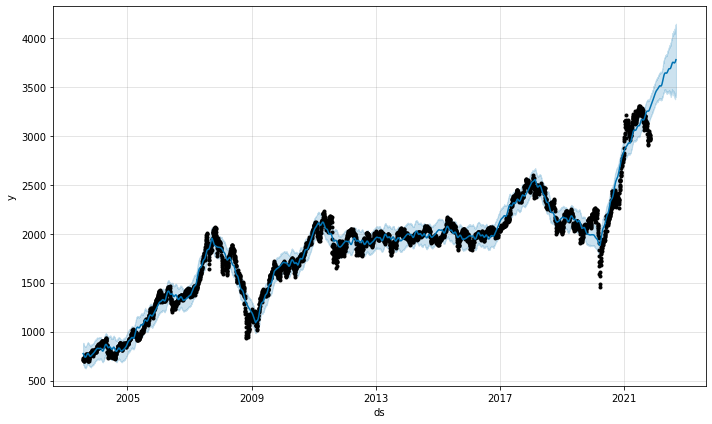

In [16]:
fig4 = model.plot(forecast) # 검은 점 실제 데이터

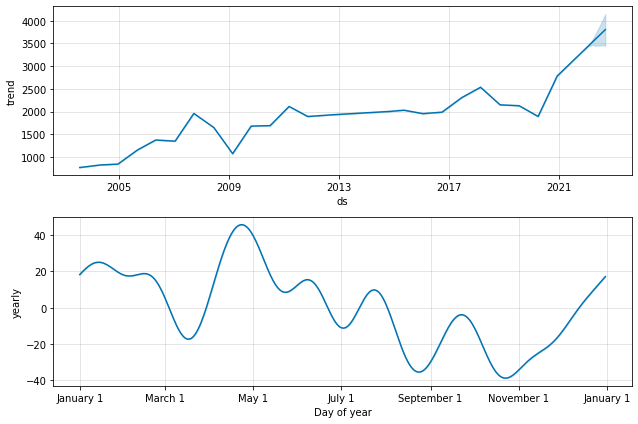

In [17]:
fig5 = model.plot_components(forecast)

In [18]:
fig6 = plot_plotly(model, forecast)
py.iplot(fig6)

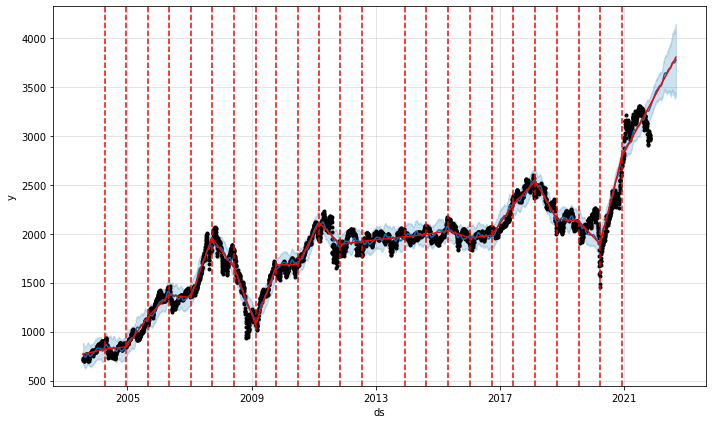

In [19]:
# changepoint 변곡점 시각화
fig7 = model.plot(forecast)
a = add_changepoints_to_plot(fig7.gca(), model, forecast)